In [1]:
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import TwoSlopeNorm


from DMS_designer import Library

In [29]:
replicates = {'rep1':['Rep1 P0','Rep1 P10'],
              'rep2':['Rep2 P0','Rep2 P10']}
			
id_cols = ['annotation']
process_call = 'annotation'
mut_id_regex = '(?P<Mut_num>\d*)pt_(?P<Position>\d*)(?P<AA>[\w*]*)_v(?P<Version>\d*)'
group_cols = ['Position','AA']
rate_method = 'l2fc'

data_file = './library_count_data/OCA_T1.xlsx'
sheet_name = 'Sheet1'

aa_keys = np.array('R,H,K,D,E,S,T,N,Q,A,V,I,L,M,F,Y,W,C,G,P,*'.split(','))

control_column = 'AA'
positive_values = ['WT']
negative_values = ['*']

wt_aa = 'ESVPGDYSKRVYQGVRVKHTVKDLLAEKRSGQTSNSRLNGSVSSSQSPFVQ'

# colorscheme = 'RdBu'
WT_color = 'xkcd:violet'

feature_sets=[
    {'name':'Segment resolved','positions':[11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32], 'color':'xkcd:red'},
    {'name':'DNA interface','positions':[12,13,14,15,16,17,18,19], 'color':'xkcd:orchid'},
     {'name':'POU2F3 interface','positions':[12,13,14,15,16,18,19,20,21,22,23,25,26,29,30], 'color':'xkcd:green'},
]

sunset_cmap = sns.blend_palette(["#5767FE", '#918AF3','#D9D6DA' , "#FFFFCC", '#FED9A4' ,"#FFB077", '#FF0000'],as_cmap=True)
to_red_cmap = sns.blend_palette(['#990000','#FF0000','#FF6666','#FFCCCC', 'xkcd:white'][::-1],as_cmap=True)

In [8]:
lib = Library.build_from_reads(data_file, replicates, id_cols, group_cols, rate_method, aa_keys, wt_aa, process_call, mut_id_regex, sheet_name=sheet_name)

lib.save('./output/libraries/OCA_T1.pkl')

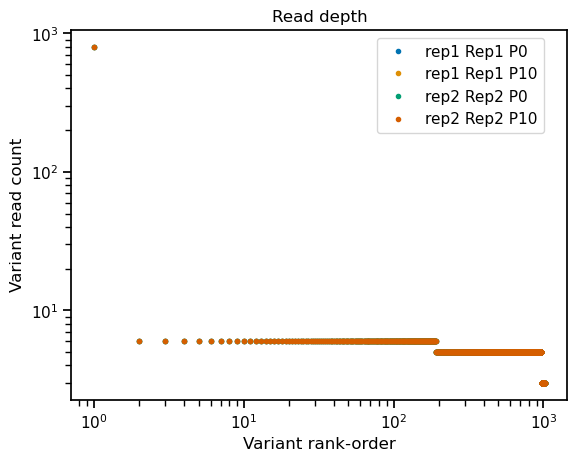

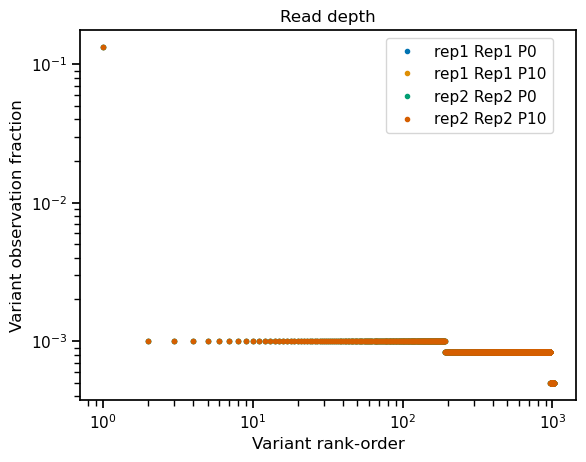

In [16]:
sns.set_palette('colorblind')

fig_read, fig_frac = lib.check_barcode_distribution_depth()

leg = fig_read.axes[0].get_legend()
leg.set_bbox_to_anchor((0.6,0.7))

leg = fig_frac.axes[0].get_legend()
leg.set_bbox_to_anchor((0.6,0.7))

plt.show()

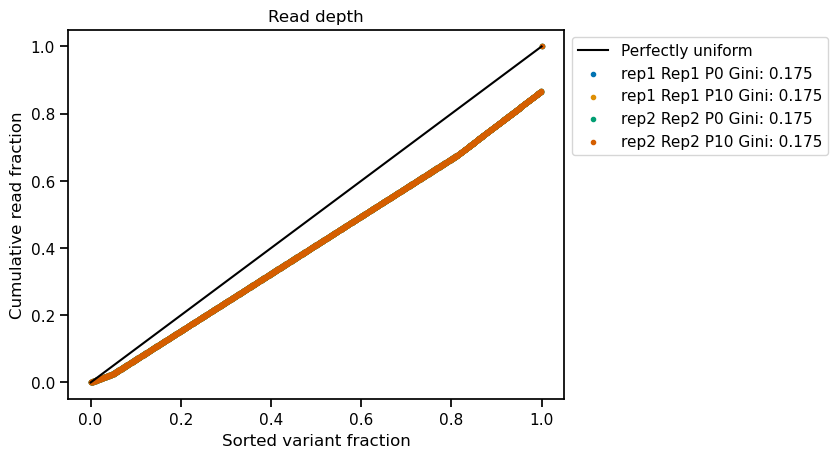

In [17]:
fig = lib.check_barcode_distribution_skew()

leg = fig.axes[0].get_legend()
leg.set_bbox_to_anchor((1,1))
plt.show()

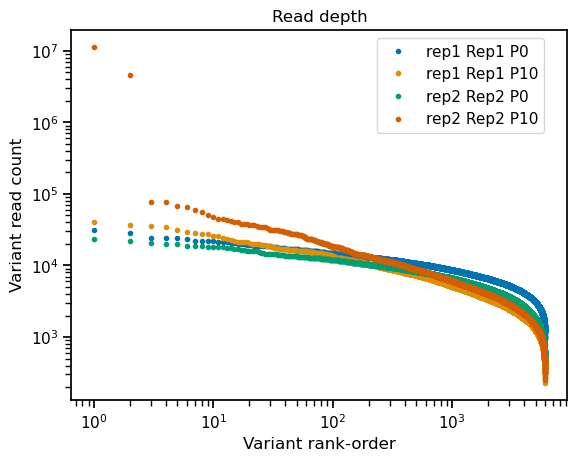

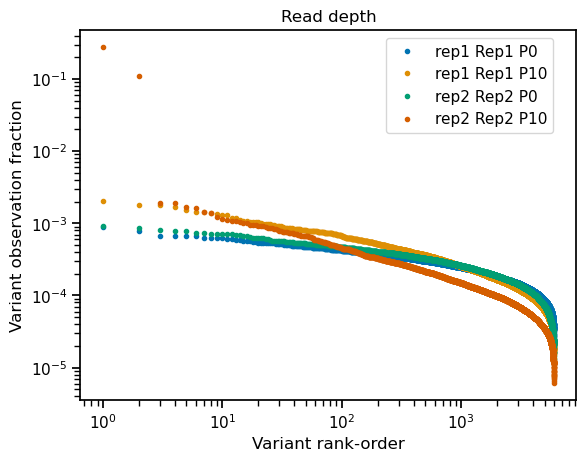

In [22]:
sns.set_palette('colorblind')

fig_read, fig_frac = lib.check_depth()


leg = fig_read.axes[0].get_legend()
leg.set_bbox_to_anchor((0.6,0.7))

leg = fig_frac.axes[0].get_legend()
leg.set_bbox_to_anchor((0.6,0.7))
plt.show()

# plt.show()

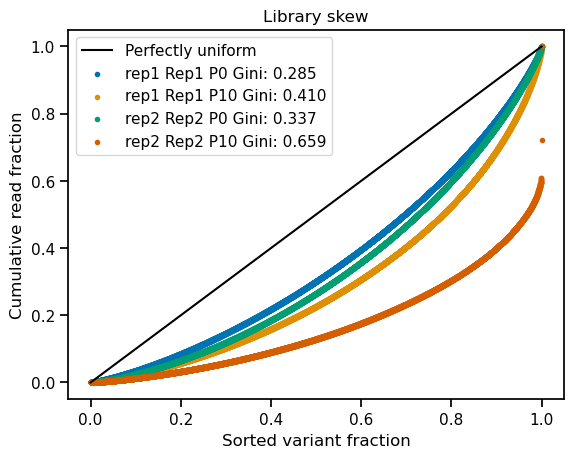

In [23]:
fig = lib.check_skew()

leg = fig.axes[0].get_legend()
leg.set_bbox_to_anchor((0,1))
plt.show()

Number of true positives: 800

Aggregate stats


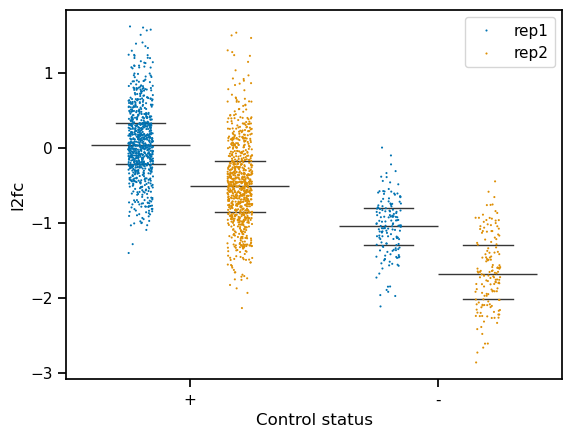

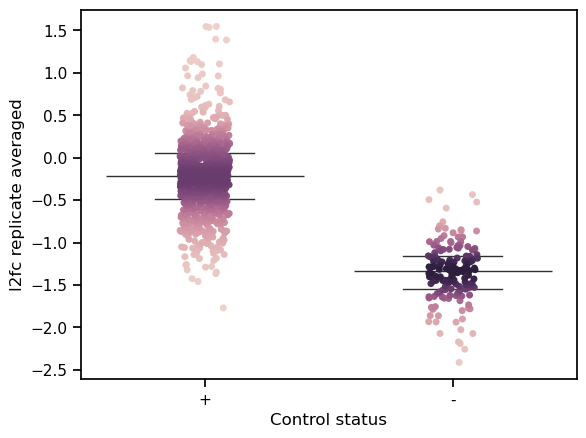

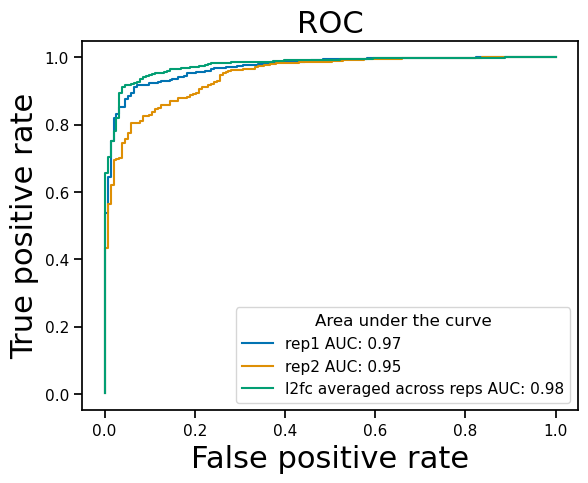

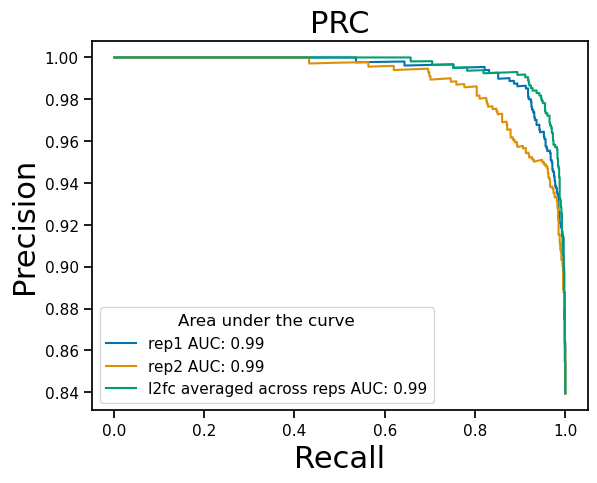

In [24]:
lib.check_controls('AA',['WT'],['*'])
plt.show()

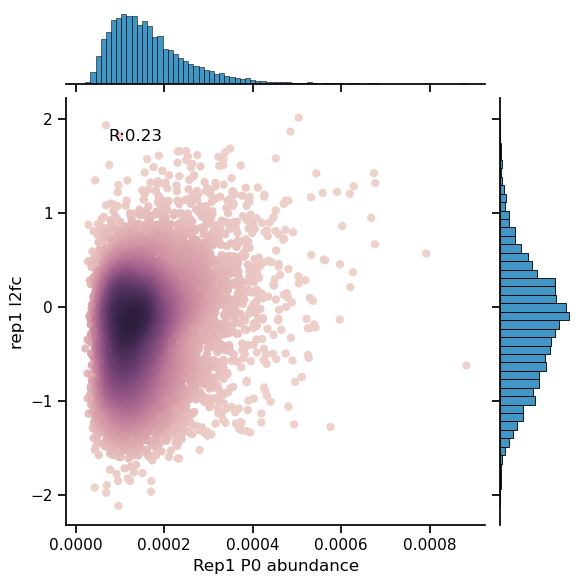

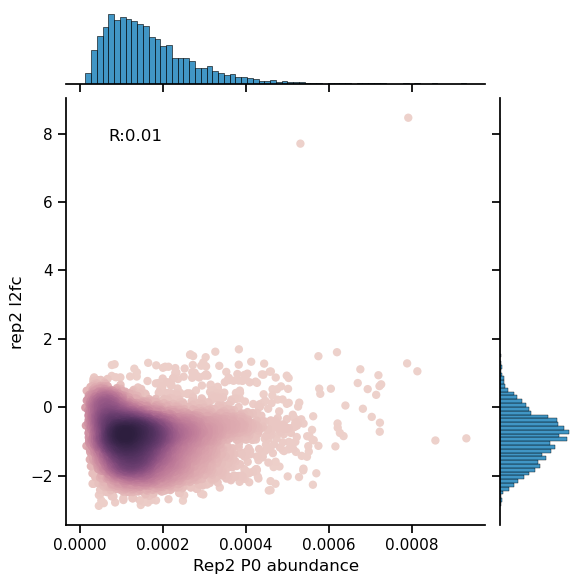

In [26]:
lib.make_initial_skew_checks()
plt.show()

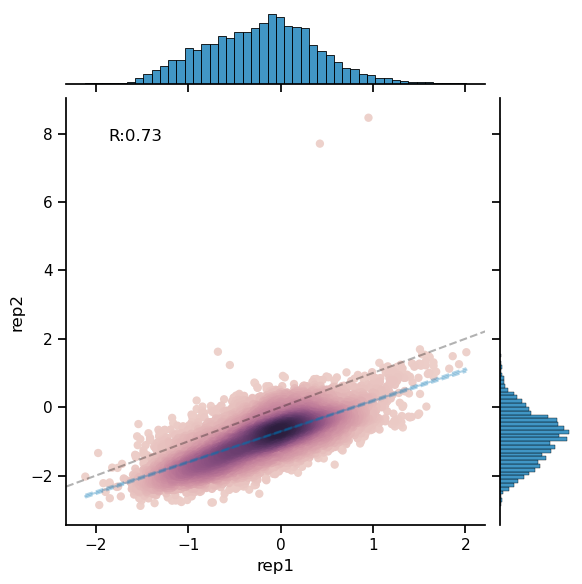

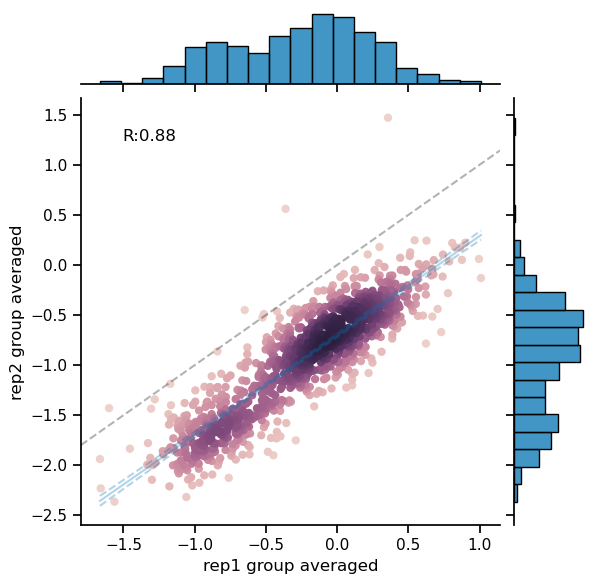

In [27]:
lib.make_replicate_checks()
plt.show()

In [30]:
# This cell makes a colormap with the colormap max and min at the actual max and min of the data, this avoids oversaturating data at the edges but mutes subtle/weak effects a bit

plot_features = True
plot_mutability = False
plot_properties = False

dead_thresh =  -0.75

fits = lib.total_average_frame
wts = fits['AA'].isin(['WT'])
fits['l2fc mean'] = fits['l2fc mean']-fits[wts]['l2fc mean'].mean()

norm = TwoSlopeNorm(vcenter=0, vmax=fits['l2fc mean'].max(), vmin=fits['l2fc mean'].min())

heatmap_fig, axd = lib.make_singles_heatmap(control_col='AA',WT_vals=['WT'],stop_vals=['*'], seq_start=2,
                                       rc_params={"figure.figsize" : (15,7), 'figure.dpi':1000}, grid=0.5, invert_mutability=True,
                                       thresh=dead_thresh,feature_sets=feature_sets, main_cmap=sunset_cmap, mutability_cmap=to_red_cmap,
                                       plot_features=plot_features, plot_mutability=plot_mutability, plot_properties=plot_properties,
                                       norm=norm
                                       )

cbar_width = 0.0135
cbar_height = 0.25
cbar_left_shift = -0.05
axd['mutant_cmap'].set_yscale('linear')
cbar_pos = axd['mutant_cmap'].get_position()
axd['mutant_cmap'].set_position((cbar_pos.bounds[0]+cbar_left_shift,cbar_pos.bounds[1]+0.11, cbar_width, cbar_height))

if plot_mutability:
    axd['mutability_cmap'].set_yscale('linear')
    cbar_pos = axd['mutability_cmap'].get_position()
    axd['mutability_cmap'].set_position((cbar_pos.bounds[0]+cbar_left_shift,cbar_pos.bounds[1], cbar_width, cbar_pos.bounds[3]))
if plot_properties:
    axd['property_cmap'].set_yscale('linear')
    cbar_pos = axd['property_cmap'].get_position()
    axd['property_cmap'].set_position((cbar_pos.bounds[0]+cbar_left_shift,cbar_pos.bounds[1], cbar_width, cbar_pos.bounds[3]))
plt.show()